In [41]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
from keras.optimizers import SGD


In [42]:
def load_and_preprocess_data():
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
    x_test = x_test.reshape(-1, 784).astype("float32") / 255.0
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)
    return x_train, y_train, x_test, y_test


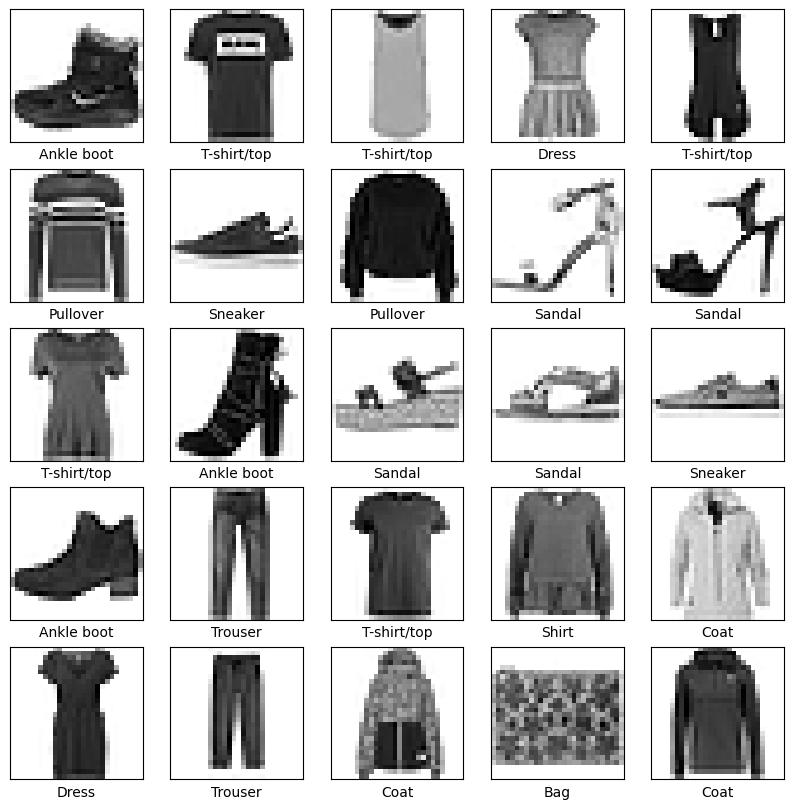

In [34]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()


In [22]:
def create_deep_dnn():
    model = Sequential()

    model.add(Dense(512, kernel_initializer='he_normal', input_shape=(784,)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.5))

    model.add(Dense(512, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.5))

    model.add(Dense(256, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.4))

    model.add(Dense(256, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.4))

    model.add(Dense(128, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.3))

    model.add(Dense(128, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.3))

    model.add(Dense(64, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    model.add(Dense(10, activation="softmax"))
    return model


In [23]:
def train_model(model, x_train, y_train):
    model.compile(
        optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

    history = model.fit(
        x_train,
        y_train,
        validation_split=0.15,
        batch_size=128,
        epochs=50,
        callbacks=[
            EarlyStopping(patience=10, restore_best_weights=True, monitor="val_accuracy"),
            ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-5, monitor="val_accuracy", verbose=1),
        ],
        verbose=1,
    )
    return history


In [24]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Loss")
    plt.legend()

    plt.show()


In [25]:
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"\nDeep DNN Test Accuracy: {test_acc:.4f}")
    return test_acc


In [37]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

def plot_predictions(model, x_test, y_test, num_images=5):
    predictions = model.predict(x_test)
    plt.figure(figsize=(15, 3 * num_images))
    for i in range(num_images):
        plt.subplot(num_images, 1, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(y_test[i])
        color = "green" if pred_label == true_label else "red"
        plt.xlabel(f"Predicted: {class_names[pred_label]} (True: {class_names[true_label]})", color=color)
    plt.tight_layout()
    plt.show()


Epoch 1/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.3029 - loss: 1.8963 - val_accuracy: 0.6880 - val_loss: 0.7791 - learning_rate: 0.0100
Epoch 2/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.6561 - loss: 0.8940 - val_accuracy: 0.7491 - val_loss: 0.6217 - learning_rate: 0.0100
Epoch 3/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.7163 - loss: 0.7545 - val_accuracy: 0.7790 - val_loss: 0.5629 - learning_rate: 0.0100
Epoch 4/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.7532 - loss: 0.6756 - val_accuracy: 0.8046 - val_loss: 0.5215 - learning_rate: 0.0100
Epoch 5/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7837 - loss: 0.6122 - val_accuracy: 0.8304 - val_loss: 0.4867 - learning_rate: 0.0100
Epoch 6/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.7935 - loss: 0.5922 - val_accuracy: 0.8416 - val_loss: 0.4510 - learning_rate: 0.0100
Epoch 7/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8103 - los

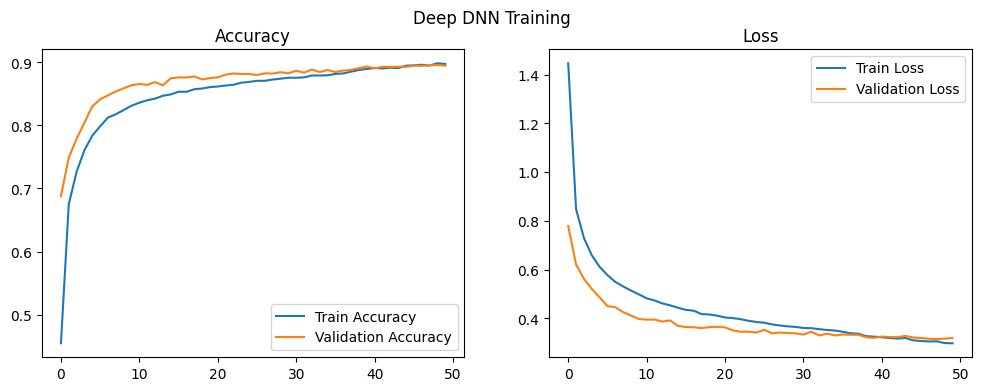


Deep DNN Test Accuracy: 0.8855

Deep DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


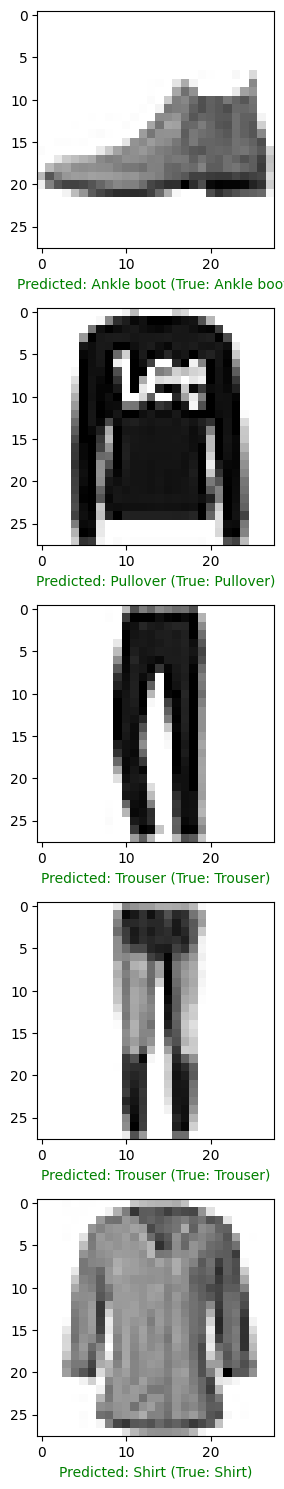

In [27]:
if __name__ == "__main__":
    x_train, y_train, x_test, y_test = load_and_preprocess_data()
    dnn_model = create_deep_dnn()
    dnn_history = train_model(dnn_model, x_train, y_train)
    plot_history(dnn_history, "Deep DNN Training")
    evaluate_model(dnn_model, x_test, y_test)
    print("\nDeep DNN Predictions:")
    plot_predictions(dnn_model, x_test, y_test)
